In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv("Training Data.csv")
click_log = pd.read_csv("click_log.csv")
test_df = pd.read_csv("Test Data.csv")

In [4]:
train_df.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,...,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [5]:
train_df.shape

(965, 56)

In [6]:
train_df.describe

<bound method NDFrame.describe of      clientid_cr                               clmbuserid_cr  \
0          75694  31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw   
1          75694  4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg   
2          75694  cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg   
3          75694  f79f3de7-5edb-4319-9549-117f47996066-10wrk   
4          30431  01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts   
..           ...                                         ...   
960         2139        41d7dab3-0ab7-4039-a936-2ceab9dbcbf7   
961        70491        39511cf3-0358-4ae9-9fec-fe3a74e98a13   
962        85572  e5d4037f-ec67-4d7b-8d83-9012ee7d64b9-1sjac   
963        75694  c7491247-f203-48df-b08d-d25d0d873e20-1sjwk   
964        75694   20dcb941-42eb-4f0c-8f96-7afe12146264-h0k8   

     conversiontime_cr                                   imprid_cr  \
0         1.620000e+12  01649076-c77f-4d70-afc8-213535427147-1sjd4   
1         1.620000e+12  f84d83b9-b757-4f97-9813-34f8dcc57

In [7]:
click_log.head()

,Unnamed: 0,imprId,clmbUserId,adSltDimId,auds,allAuds,itemid,algo,advClientId,pubClientId,...,devTypeDimId,vendorDimId,modelDimId,connTypeDimId,browserDimId,refClusterId,fraud,cpa,imprUserId,optout
0,0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,...,196047.0,196460.0,202038.0,264494,129639.0,NaN,NaN,NaN,NaN,NaN
1,0,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
2,0,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
3,0,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
4,0,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,...,196047.0,196460.0,202038.0,264494,129639.0,NaN,NaN,NaN,NaN,NaN


In [8]:
click_log.shape

(244864, 55)

In [9]:
click_log.describe

<bound method NDFrame.describe of         Unnamed: 0                                      imprId  \
0                0  72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts   
1                0   210a7e16-6783-46a5-9246-c635db091490-3qpg   
2                0  179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc   
3                0  79ce617b-88bf-46db-8069-6c892df6a306-1sjo8   
4                0  c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8   
...            ...                                         ...   
244859           0  c510e436-f20c-4c38-8093-23cf67aa7bea-1sjac   
244860           0  20b55a65-b153-4542-80f1-1d76ae78866f-1sjio   
244861           0  b743ca09-56e0-47a7-89fd-a3ccaed28a46-1sjio   
244862           0   4f7ad652-633c-44f7-8325-df426a85565a-62t8   
244863           0  8a2f5515-6e54-42aa-8653-59c9ed412c55-1sjwk   

                                        clmbUserId  adSltDimId  \
0        e91fcf75-a645-40f6-ab1f-411017d1d19a-631k      207251   
1        be37dc3a-d12b-4aa5-bd39-1e42ede9

In [10]:
test_df.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,...,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,...,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,...,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,...,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,...,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,...,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN


In [11]:
test_df.shape

(455, 56)

In [12]:
test_df.describe

<bound method NDFrame.describe of      record_id  clientid_cr                               clmbuserid_cr  \
0         1000        82122   1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw   
1         1001        75694  53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0   
2         1002        75694  53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0   
3         1003        30431  5febd7e2-b66a-4af0-91ec-117557684188-10wrk   
4         1004        30431  5febd7e2-b66a-4af0-91ec-117557684188-10wrk   
..         ...          ...                                         ...   
450       1450        75694   d7b5dfcb-b5ea-4862-8e47-5d775c568b00-6m6g   
451       1451        75694  81b2e0f3-ba16-4f1d-ba54-cbb18ab54dca-1sjac   
452       1452        75694  9453538d-3c8a-4e9b-aff3-85a37b722429-1sj4s   
453       1453         8895        8399fad4-a7de-49ec-9e58-d18530086e7d   
454       1454        75694   f4e73931-1c75-486c-874c-472ccf018827-6mhk   

     conversiontime_cr                                   imprid_c

In [13]:
len(train_df.columns)

56

In [14]:
len(click_log.columns)

55

In [15]:
len(test_df.columns)

56

### Feature Engineering

In [18]:
train_df.isnull().sum()

clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                           20
audiences_cr                     199
clickbid_cr                      296
geodimid_cr                        0
ip_cr                             20
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                       20
pubclientid_cr                     0
refurl_cr                        125
siteId_cr                          0
templateid_cr                    107
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               1
allAudiences_cr                   47
pricingtype_cr                     0
osId_cr                           21
browserId_cr                      21
cityId_cr                         20
stateId_cr                        20
m

In [19]:
train_df.isnull().mean()*100

clientid_cr                       0.000000
clmbuserid_cr                     0.000000
conversiontime_cr                 0.000000
imprid_cr                         0.000000
adslotdimid_cr                    0.000000
algo_cr                           2.072539
audiences_cr                     20.621762
clickbid_cr                      30.673575
geodimid_cr                       0.000000
ip_cr                             2.072539
itemcolumbiaid_cr                 0.000000
itemid_cr                         0.000000
position_cr                       2.072539
pubclientid_cr                    0.000000
refurl_cr                        12.953368
siteId_cr                         0.000000
templateid_cr                    11.088083
goalid_cr                         0.000000
time_cr                           0.000000
adLogType_cr                      0.000000
v_cr                              0.103627
allAudiences_cr                   4.870466
pricingtype_cr                    0.000000
osId_cr    

In [20]:
#Drop the featutres which has more number of null values
features_not_needed = []
for feature in train_df.columns:
    if train_df[feature].isnull().mean()*100 >= 40:
        features_not_needed.append(feature)

In [21]:
train_df = train_df.drop(features_not_needed, axis = "columns")

In [22]:
train_df.shape

(965, 42)

In [23]:
def null_values(df, feature_list):
    for col in feature_list:
        print(col, "-->", df[col].isnull().mean()*100)

In [24]:
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
numerical_features

['clientid_cr',
 'conversiontime_cr',
 'adslotdimid_cr',
 'algo_cr',
 'clickbid_cr',
 'geodimid_cr',
 'itemcolumbiaid_cr',
 'itemid_cr',
 'position_cr',
 'pubclientid_cr',
 'siteId_cr',
 'templateid_cr',
 'goalid_cr',
 'time_cr',
 'adLogType_cr',
 'v_cr',
 'pricingtype_cr',
 'osId_cr',
 'browserId_cr',
 'cityId_cr',
 'stateId_cr',
 'modelDimId_cr',
 'lookUpFrom_cr',
 'ispDimId_cr',
 'countryDimId_cr',
 'goalTypeId_cr',
 'conversionDurationInMillis_cr',
 'impressionTimeInMillis_cr',
 'clickTimeInMillis_cr',
 'osVerDimId_cr',
 'uuidSource_cr',
 'geoGrpDimId_cr',
 'stateGrpDimId_cr',
 'cityGrpDimId_cr',
 'conversion_fraud']

In [25]:
null_values(train_df, numerical_features)

clientid_cr --> 0.0
conversiontime_cr --> 0.0
adslotdimid_cr --> 0.0
algo_cr --> 2.072538860103627
clickbid_cr --> 30.67357512953368
geodimid_cr --> 0.0
itemcolumbiaid_cr --> 0.0
itemid_cr --> 0.0
position_cr --> 2.072538860103627
pubclientid_cr --> 0.0
siteId_cr --> 0.0
templateid_cr --> 11.088082901554404
goalid_cr --> 0.0
time_cr --> 0.0
adLogType_cr --> 0.0
v_cr --> 0.10362694300518134
pricingtype_cr --> 0.0
osId_cr --> 2.1761658031088085
browserId_cr --> 2.1761658031088085
cityId_cr --> 2.072538860103627
stateId_cr --> 2.072538860103627
modelDimId_cr --> 2.1761658031088085
lookUpFrom_cr --> 0.0
ispDimId_cr --> 2.072538860103627
countryDimId_cr --> 2.072538860103627
goalTypeId_cr --> 0.0
conversionDurationInMillis_cr --> 2.072538860103627
impressionTimeInMillis_cr --> 2.072538860103627
clickTimeInMillis_cr --> 13.678756476683937
osVerDimId_cr --> 2.1761658031088085
uuidSource_cr --> 2.072538860103627
geoGrpDimId_cr --> 2.072538860103627
stateGrpDimId_cr --> 10.880829015544041
cityG

In [26]:
numerical_features_with_nan = [feature for feature in numerical_features if train_df[feature].isnull().mean() != 0]

In [27]:
numerical_features_with_nan

['algo_cr',
 'clickbid_cr',
 'position_cr',
 'templateid_cr',
 'v_cr',
 'osId_cr',
 'browserId_cr',
 'cityId_cr',
 'stateId_cr',
 'modelDimId_cr',
 'ispDimId_cr',
 'countryDimId_cr',
 'conversionDurationInMillis_cr',
 'impressionTimeInMillis_cr',
 'clickTimeInMillis_cr',
 'osVerDimId_cr',
 'uuidSource_cr',
 'geoGrpDimId_cr',
 'stateGrpDimId_cr',
 'cityGrpDimId_cr']

In [30]:
def plot_hist(df, feature):
    plt.hist(df[feature], color='blue')
    plt.title(feature)
    plt.show()

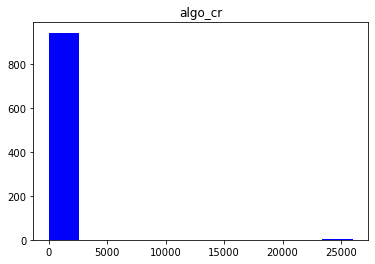

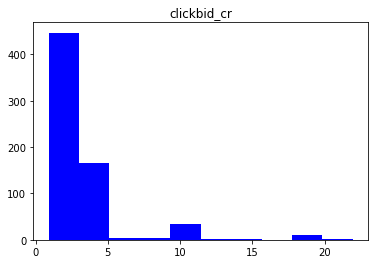

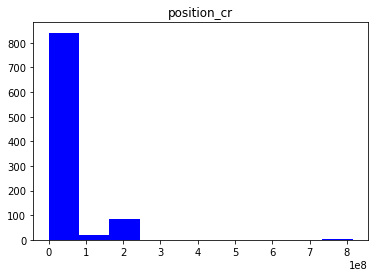

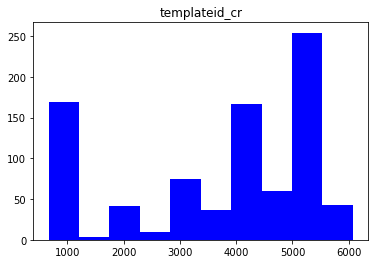

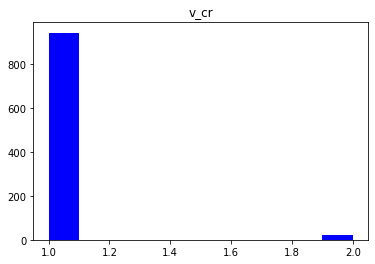

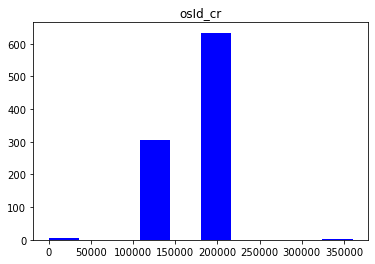

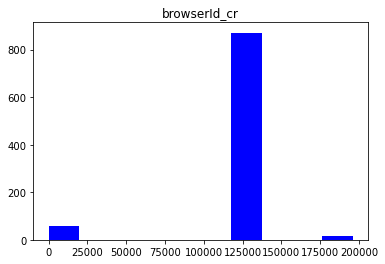

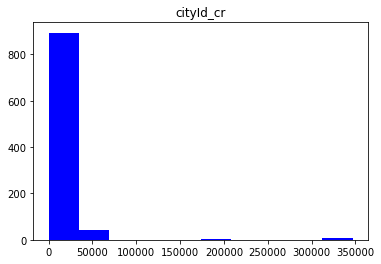

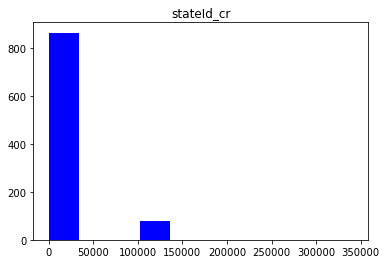

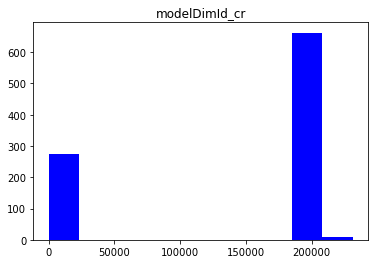

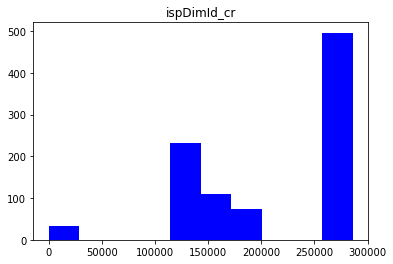

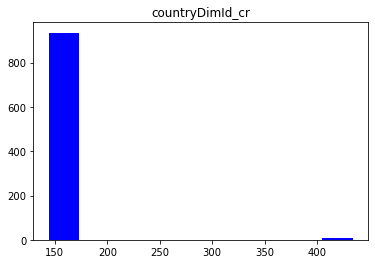

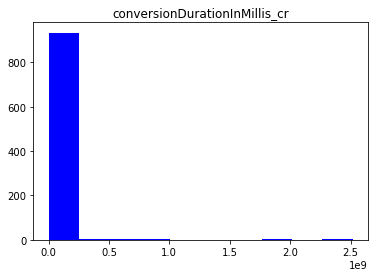

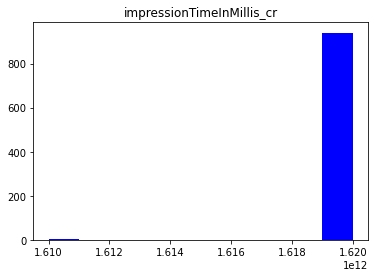

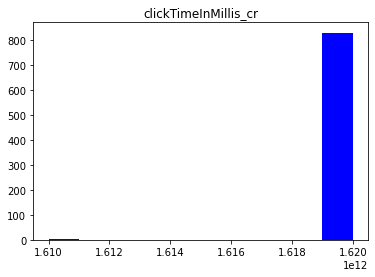

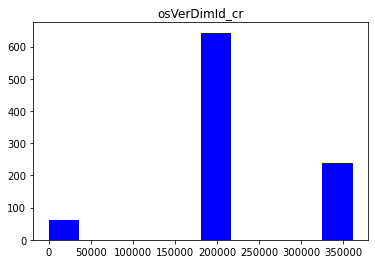

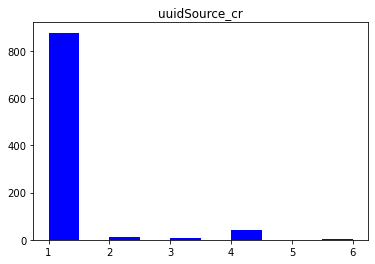

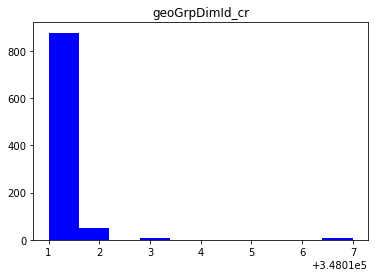

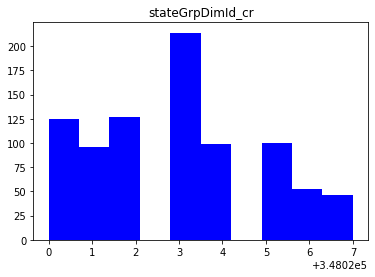

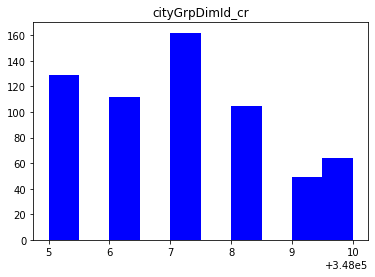

In [31]:
for feature in numerical_features_with_nan:
    plot_hist(train_df, feature)

#####  Filling the values with sample random imputation

In [32]:
def impute_nan(df,variable):
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [33]:
for feature in numerical_features_with_nan:
    impute_nan(train_df, feature)

In [34]:
train_df.shape

(965, 42)

In [35]:
#Fill the missing values for categorical variables
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O' ]

In [36]:
categorical_features_with_nan = [feature for feature in categorical_features if train_df[feature].isnull().mean() != 0 ]
categorical_features_with_nan

['audiences_cr', 'ip_cr', 'refurl_cr', 'allAudiences_cr', 'connTypeDimId_cr']

In [37]:
null_values(train_df, categorical_features_with_nan)

audiences_cr --> 20.621761658031087
ip_cr --> 2.072538860103627
refurl_cr --> 12.953367875647666
allAudiences_cr --> 4.870466321243523
connTypeDimId_cr --> 2.072538860103627


In [38]:
for feature in categorical_features_with_nan:
    print(feature, "-->", len(train_df[feature].unique()))

audiences_cr --> 441
ip_cr --> 2
refurl_cr --> 400
allAudiences_cr --> 821
connTypeDimId_cr --> 10


In [39]:
# Dropping the feature ip_cr dosen't contain any valuable information
train_df.drop(['ip_cr'], axis="columns", inplace=True)

In [40]:
categorical_features_with_nan.remove('ip_cr')

In [41]:
for feature in categorical_features_with_nan:
    impute_nan(train_df, feature)

In [42]:
null_values(train_df, categorical_features_with_nan)

audiences_cr --> 0.0
refurl_cr --> 0.0
allAudiences_cr --> 0.0
connTypeDimId_cr --> 0.0


In [43]:
train_df.isnull().mean()

clientid_cr                      0.0
clmbuserid_cr                    0.0
conversiontime_cr                0.0
imprid_cr                        0.0
adslotdimid_cr                   0.0
algo_cr                          0.0
audiences_cr                     0.0
clickbid_cr                      0.0
geodimid_cr                      0.0
itemcolumbiaid_cr                0.0
itemid_cr                        0.0
position_cr                      0.0
pubclientid_cr                   0.0
refurl_cr                        0.0
siteId_cr                        0.0
templateid_cr                    0.0
goalid_cr                        0.0
time_cr                          0.0
adLogType_cr                     0.0
v_cr                             0.0
allAudiences_cr                  0.0
pricingtype_cr                   0.0
osId_cr                          0.0
browserId_cr                     0.0
cityId_cr                        0.0
stateId_cr                       0.0
modelDimId_cr                    0.0
l

In [44]:
train_df['conversiontime_cr'].unique()

array([1.62e+12])

### Feature Selection

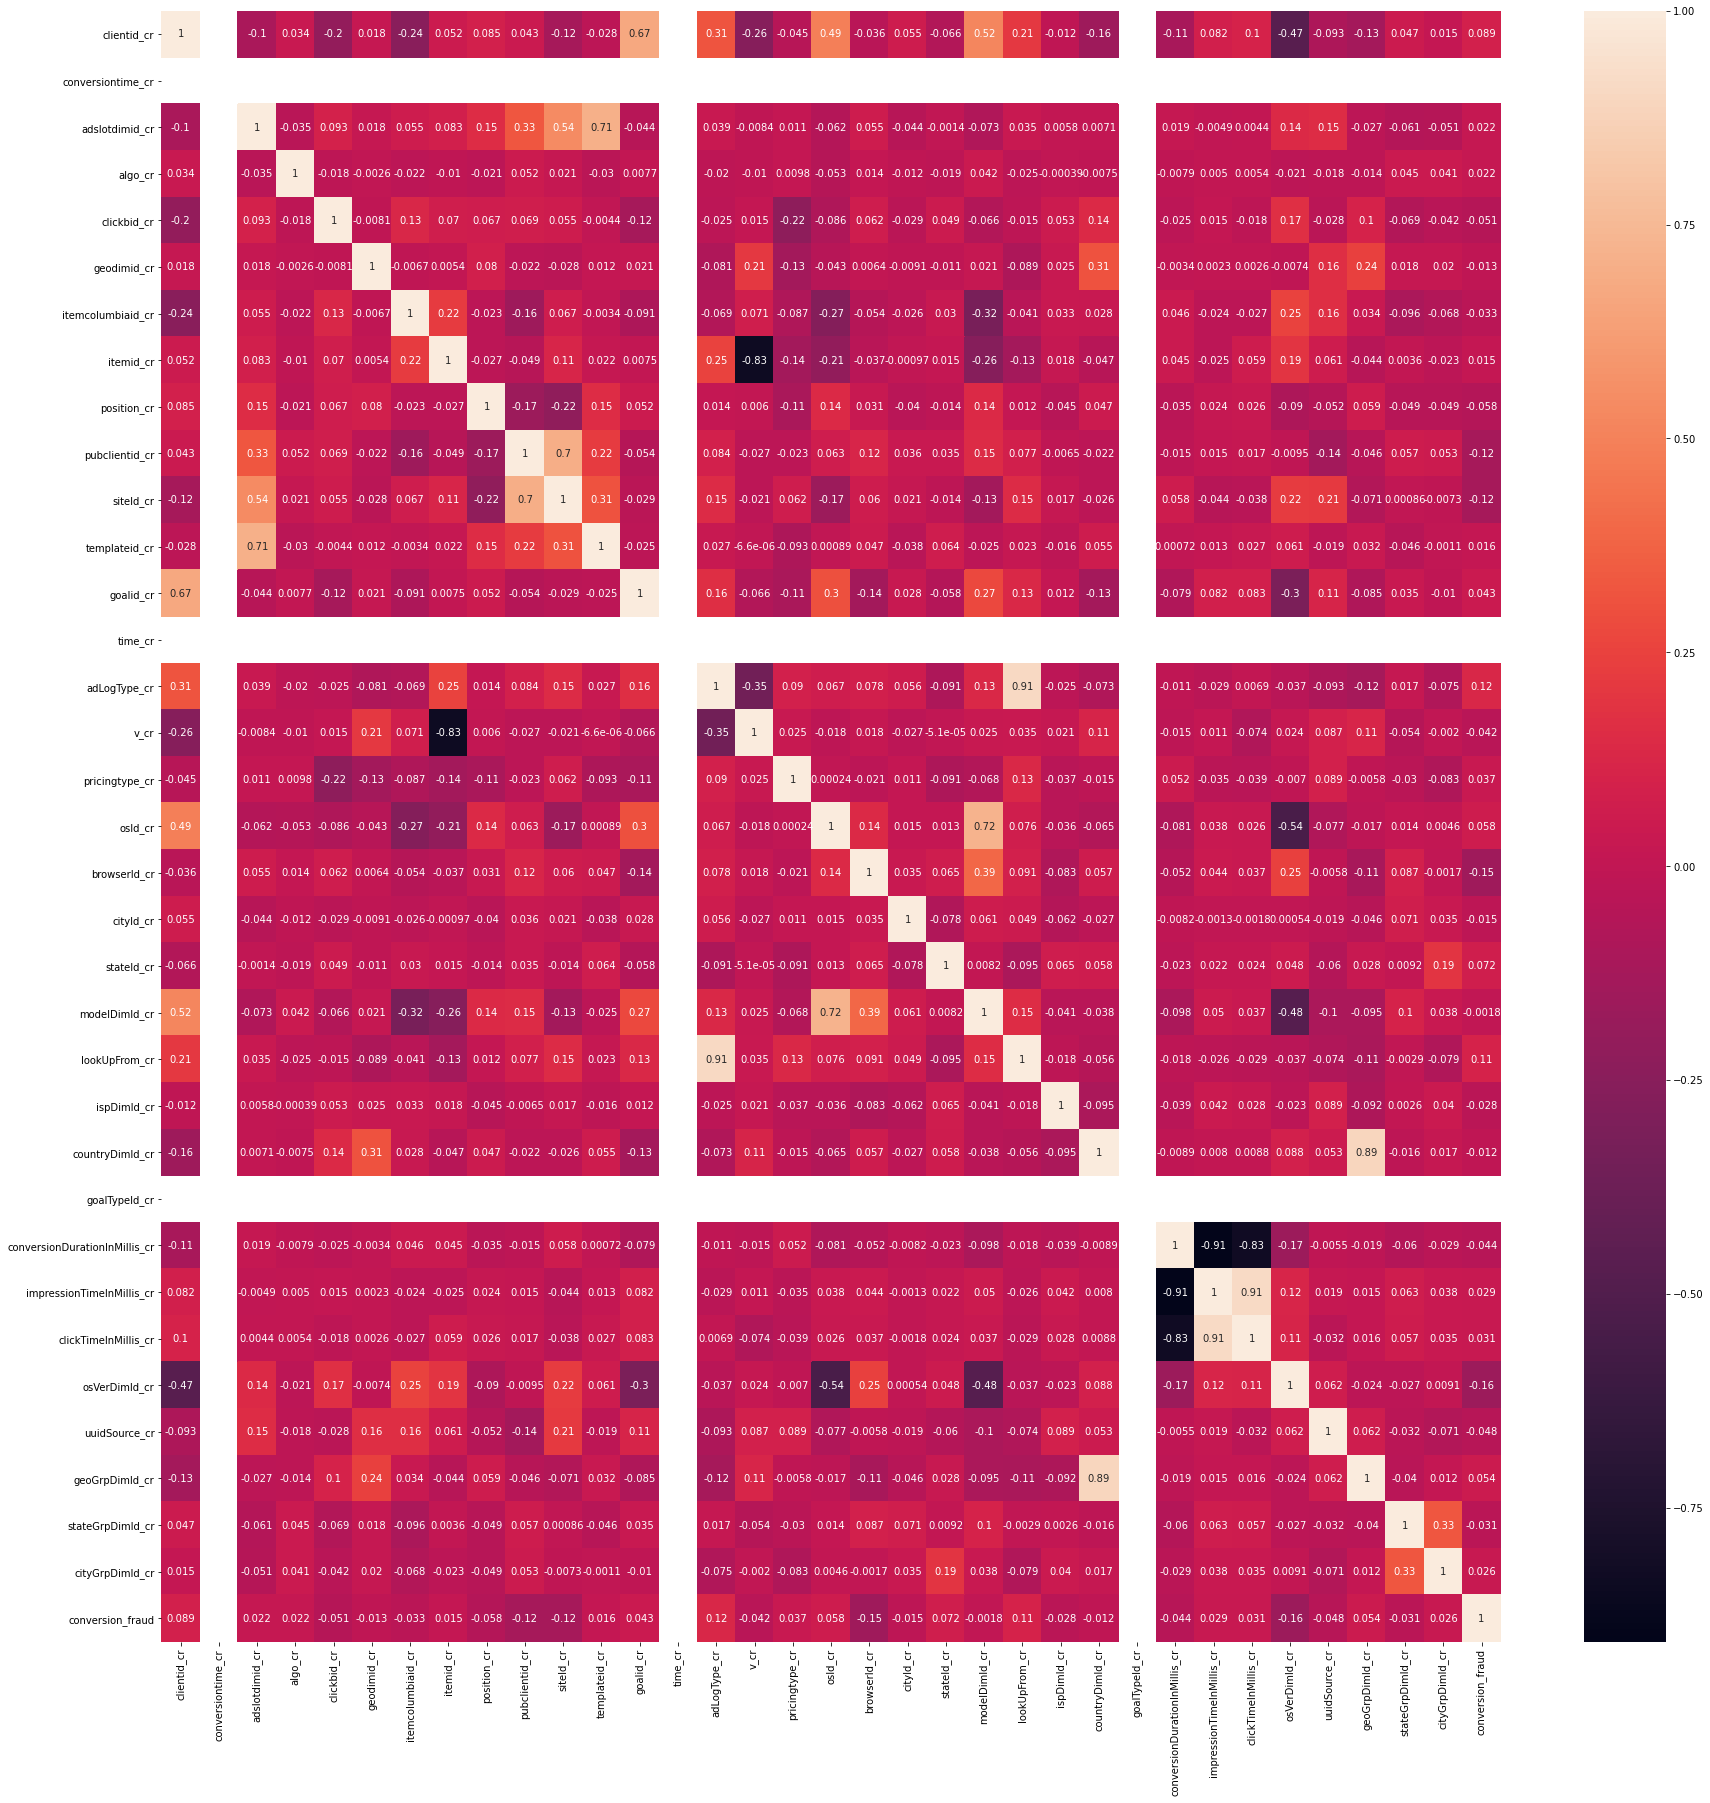

In [46]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(train_df.corr(),annot=True)


In [48]:
#Remove the features which are highly correlated
#with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
list(correlation(train_df, 0.85))

['clickTimeInMillis_cr', 'geoGrpDimId_cr', 'lookUpFrom_cr']

In [50]:
#dropping features those threshold value is greater thean 0.85
train_df.drop(correlation(train_df, 0.85), axis="columns", inplace=True)

In [51]:
train_df.shape

(965, 38)

##### For categorical variables 

In [52]:
train_df['clmbuserid_cr']

0      31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw
1      4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg
2      cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg
3      f79f3de7-5edb-4319-9549-117f47996066-10wrk
4      01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts
                          ...                    
960          41d7dab3-0ab7-4039-a936-2ceab9dbcbf7
961          39511cf3-0358-4ae9-9fec-fe3a74e98a13
962    e5d4037f-ec67-4d7b-8d83-9012ee7d64b9-1sjac
963    c7491247-f203-48df-b08d-d25d0d873e20-1sjwk
964     20dcb941-42eb-4f0c-8f96-7afe12146264-h0k8
Name: clmbuserid_cr, Length: 965, dtype: object

In [53]:
train_df['imprid_cr']

0      01649076-c77f-4d70-afc8-213535427147-1sjd4
1      f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw
2      061edef6-3d9d-408b-884a-ad840e6930ce-10o78
3      0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0
4      0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8
                          ...                    
960    a9371035-94c0-49a9-b807-70e472bb31a9-1sk24
961    a955a5eb-1f0f-4654-8381-9f709bb98a7a-10ni8
962    a97061e8-4863-440a-956c-14c85984c29e-10nw4
963    a974732d-bfa0-4018-b216-b2d1c97f3337-1sj7k
964    a9794d23-4f67-4446-8c34-6fb608435f40-1siz8
Name: imprid_cr, Length: 965, dtype: object

In [54]:
train_df['audiences_cr']

0                                                8gw,o3b
1                                        8kv,2vk,8gw,2vl
2                                                8gw,o3b
3                                                8gw,o3b
4                                        8kv,2vk,8gw,2vl
                             ...                        
960    8go,8gr,8k6,8h4,8gv,2vk,8gw,8iy,3si,2x6,nqv,2v...
961                      2x6,8k6,8k8,30r,8gv,2vk,8gw,8j1
962                                  2vv,2vk,8gw,2vb,o3b
963                                          nqv,2vk,8gw
964                                                  8gv
Name: audiences_cr, Length: 965, dtype: object

In [55]:
#Dropping the features which doesn't contain valuable information
train_df.drop(['clmbuserid_cr', 'imprid_cr', 'audiences_cr'], axis="columns", inplace=True)

In [56]:
train_df.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,75694,1.620000e+12,321300,38.0,2.869316,144,5488088,49504155,1.0,2320,...,280429.0,144.0,10,2332.0,1.620000e+12,199452.0,1.0,348022.0,348007.0,True
1,75694,1.620000e+12,129239,38.0,2.790000,144,5488773,49504157,1.0,15240,...,136127.0,144.0,10,3201.0,1.620000e+12,199452.0,1.0,348024.0,348010.0,True
2,75694,1.620000e+12,321554,21.0,2.790000,144,5488088,49504160,1.0,2320,...,172725.0,144.0,10,2821.0,1.620000e+12,199452.0,1.0,348027.0,348005.0,True
3,75694,1.620000e+12,321300,38.0,2.790000,144,5488088,49504155,1.0,2320,...,136127.0,144.0,10,3144.0,1.620000e+12,199452.0,1.0,348023.0,348007.0,True
4,30431,1.620000e+12,355768,21.0,2.790000,144,5614054,53607445,1.0,1,...,136127.0,144.0,10,42597.0,1.620000e+12,360833.0,1.0,348025.0,348007.0,True


In [57]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
refurl_cr                         object
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
allAudiences_cr                   object
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr

In [58]:
train_df['refurl_cr']

0      https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...
1      https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...
2      https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...
3      https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...
4      https%3A%2F%2Ftelugu.samayam.com%2Fvideo-galle...
                             ...                        
960        http%3A%2F%2Fnavbharattimes.indiatimes.com%2F
961          http%3A%2F%2Ftimesofindia.indiatimes.com%2F
962    https%3A%2F%2Fwww.sakshieducation.com%2FPrevio...
963                          https%3A%2F%2Fwww.olx.in%2F
964                          https%3A%2F%2Fwww.olx.in%2F
Name: refurl_cr, Length: 965, dtype: object

In [59]:
train_df['connTypeDimId_cr']

0      264496
1      264496
2      264503
3      264496
4      264496
        ...  
960    264494
961    264496
962    264496
963    264494
964    264496
Name: connTypeDimId_cr, Length: 965, dtype: object

In [60]:
train_df['refurl_cr'][1]

'https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-scores%2F32278%2Find-vs-eng-4th-t20i-england-tour-of-india-2021'

In [61]:
train_df['allAudiences_cr']

0      7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...
1      h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...
2      7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...
3      p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...
4                                                761,75y
                             ...                        
960    7dm,jyq,8h4,k1m,nyw,lo4,nqv,o1w,o1v,apc,o1y,o1...
961    jyq,ige,33h,41f,mss,oy7,nyw,oy9,lo4,ii1,nqx,o1...
962                                                  9nj
963                                          hkf,9nj,5xq
964                                          hkf,9nj,5xq
Name: allAudiences_cr, Length: 965, dtype: object

In [62]:
cols_not_needed = ['refurl_cr', 'allAudiences_cr']

In [63]:
train_df.drop(cols_not_needed, axis="columns", inplace=True)

In [64]:
#Coverting the datatype to numeric
train_df['connTypeDimId_cr'] = pd.to_numeric(train_df['connTypeDimId_cr'], errors='coerce')

In [65]:
train_df['connTypeDimId_cr'].isnull().mean()*100

0.7253886010362695

In [66]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr                 float64
ispDimId_cr                      float64
countryDimId_cr 

In [67]:
train_df[pd.to_numeric(train_df.connTypeDimId_cr,errors='coerce').isnull()==True]

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
203,29892,1.620000e+12,334766,33.0,2.79,433,5592344,53924039,1.0,76969,...,0.0,433.0,10,3670493.0,1.620000e+12,360833.0,3.0,348021.0,348009.0,False
309,25470,1.620000e+12,236059,2.0,2.79,144,5617958,53924418,10.0,15240,...,136127.0,144.0,10,19311004.0,1.620000e+12,360833.0,3.0,348023.0,348007.0,False
422,2139,1.620000e+12,195755,18.0,10.00,144,5610374,53184763,2.0,7268,...,136127.0,144.0,10,684436.0,1.620000e+12,359921.0,3.0,348020.0,348006.0,False
630,31365,1.620000e+12,195755,18.0,0.90,144,5616679,53930184,2.0,7268,...,280429.0,144.0,10,13152725.0,1.620000e+12,360833.0,3.0,348020.0,348006.0,False
676,25470,1.620000e+12,355148,38.0,2.79,144,5614752,53924415,1.0,2316,...,280429.0,144.0,10,44955769.0,1.620000e+12,359921.0,3.0,348026.0,348008.0,False
681,31365,1.620000e+12,334762,18.0,2.79,144,5616679,53930182,1.0,76969,...,280429.0,144.0,10,13239231.0,1.620000e+12,359921.0,3.0,348020.0,348006.0,False
774,29892,1.620000e+12,355148,18.0,2.79,144,5583264,53924038,1.0,2316,...,147211.0,144.0,10,2146992.0,1.620000e+12,359921.0,3.0,348022.0,348007.0,False


In [68]:
impute_nan(train_df, 'connTypeDimId_cr')

In [69]:
train_df['connTypeDimId_cr'].isnull().mean()

0.0

In [70]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr                 float64
ispDimId_cr                      float64
countryDimId_cr 

### Featutre Scaling

In [71]:
cols_to_scale = [feature for feature in train_df.columns if feature != 'conversion_fraud']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

In [72]:
train_df.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,0.873346,0.0,0.830089,0.001423,0.09359,0.0,0.944360,0.867568,1.225933e-09,0.027273,...,0.979856,0.0,0.0,8.463155e-07,1.0,0.551815,0.0,0.285714,0.4,True
1,0.873346,0.0,0.000527,0.001423,0.08982,0.0,0.944648,0.867568,1.225933e-09,0.179221,...,0.475646,0.0,0.0,1.191272e-06,1.0,0.551815,0.0,0.571429,1.0,True
2,0.873346,0.0,0.831186,0.000769,0.08982,0.0,0.944360,0.867568,1.225933e-09,0.027273,...,0.603524,0.0,0.0,1.040428e-06,1.0,0.551815,0.0,1.000000,0.0,True
3,0.873346,0.0,0.830089,0.001423,0.08982,0.0,0.944360,0.867568,1.225933e-09,0.027273,...,0.475646,0.0,0.0,1.168646e-06,1.0,0.551815,0.0,0.428571,0.4,True
4,0.345516,0.0,0.978965,0.000769,0.08982,0.0,0.997236,0.990331,1.225933e-09,0.000000,...,0.475646,0.0,0.0,1.682985e-05,1.0,0.998301,0.0,0.714286,0.4,True


In [73]:
train_df['conversion_fraud'].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

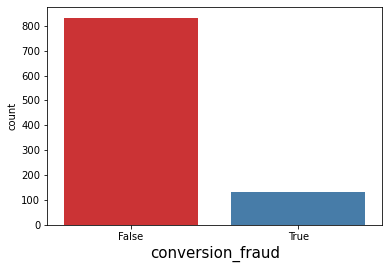

In [75]:
sns.countplot(train_df['conversion_fraud'], palette='Set1')
plt.xlabel('conversion_fraud', size = 15)
plt.show()

##### As the dataset is imbalanced we need to balance it

In [76]:
train_df['conversion_fraud'].replace({True:1, False:0}, inplace=True)

In [77]:
X = train_df.drop('conversion_fraud', axis="columns")
y = train_df['conversion_fraud']

### SMOTE to Balance the dataset

In [78]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X,y = smk.fit_resample(X, y)

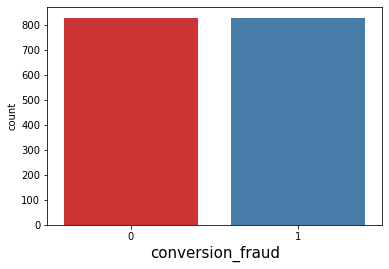

In [79]:
sns.countplot(y, palette='Set1')
plt.xlabel('conversion_fraud', size = 15)
plt.show()

In [80]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

###### Models Without Hyper-parameter Tuning 

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [124]:
# Let's implement simple classifiers

ran = RandomForestClassifier(n_estimators=100)

naive = GaussianNB()


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random forest" : ran,
    "Naive bayes" : naive}

In [125]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 69.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 84.0 % accuracy score
Classifiers:  SVC Has a training score of 74.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 97.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 60.0 % accuracy score


In [126]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=X_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=KNeighborsClassifier(), X=X, y=y, cv=10)

In [127]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.9698678514467989
Random Forest Standart Deviation:  0.020432548046592374
KNN Average accuracy:  0.8673311427528295
KNN Standart Deviation:  0.02517637835774448


##### Using Neural Network

In [81]:
from tensorflow import keras
import tensorflow as tf

In [82]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
42/42 [==============================] - 2s 3ms/step - loss: 0.6995 - accuracy: 0.5255
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6901
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6971
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6996
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7276
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7030
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7013
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7398
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7503
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7383
Epoch 11/

In [83]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8735


[0.26794111728668213, 0.8734939694404602]

##### Hyper Parameter Tuning for ML Algorithms 

##### Logistic Regression

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr_score = cross_val_score(LogisticRegression(), X, y, cv=10)
lr_score.mean()

0.7087039065352319

##### Decision Tress

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.04052348, 0.02343733]),
 'std_fit_time': array([0.06583253, 0.00780375]),
 'mean_score_time': array([0.00650473, 0.001562  ]),
 'std_score_time': array([0.01039454, 0.004686  ]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.89156627, 0.88554217]),
 'split1_test_score': array([0.89156627, 0.87951807]),
 'split2_test_score': array([0.94578313, 0.92771084]),
 'split3_test_score': array([0.95783133, 0.95180723]),
 'split4_test_score': array([0.87349398, 0.91566265]),
 'split5_test_score': array([0.93975904, 0.95180723]),
 'split6_test_score': array([0.93975904, 0.92771084]),
 'split7_test_score': array([0.92771084, 0.94578313]),
 'split8_test_score': array([0.95757576, 0.93939394]),
 'split9_test_score': array([0.93333333, 0.96969697]),
 'mean_test_score': array([0.9258379

In [86]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df[['param_criterion', 'mean_test_score']]

,param_criterion,mean_test_score
0,gini,0.925838
1,entropy,0.929463


In [143]:
clf.score(X_test,y_test)

0.9186746987951807

##### Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[1, 5, 10, 20, 40, 50,60]}, cv=10, return_train_score=False)
rf_clf.fit(X, y)
rf_clf.cv_results_

{'mean_fit_time': array([0.01569817, 0.03909822, 0.06719692, 0.10080109, 0.18209271,
        0.21950021, 0.26270647]),
 'std_fit_time': array([0.00313402, 0.00615469, 0.01232119, 0.01537831, 0.01697779,
        0.02661011, 0.03056638]),
 'mean_score_time': array([0.00670204, 0.00660233, 0.00770004, 0.00749879, 0.01159856,
        0.01259582, 0.01539264]),
 'std_score_time': array([0.00173491, 0.00174455, 0.00293183, 0.00135241, 0.00233393,
        0.00257163, 0.0031879 ]),
 'param_n_estimators': masked_array(data=[1, 5, 10, 20, 40, 50, 60],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60}],
 'split0_test_score': array([0.81927711, 0.88554217, 0.91566265, 0.88554217, 0.90361446,
        0.91566265, 0.90963855]),
 'split1_test_score': array([0.

In [88]:
rf_result_df = pd.DataFrame(rf_clf.cv_results_)
rf_result_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,1,0.886652
1,5,0.951183
2,10,0.955988
3,20,0.968058
4,40,0.971676
5,50,0.969854
6,60,0.972881


In [152]:
rf_clf.score(X_test,y_test)

0.9759036144578314

In [154]:
ylog=rf_clf.predict(X_test)

In [156]:
score = accuracy_score(y_test, ylog)
score

0.9759036144578314

In [155]:
print(classification_report(y_test,ylog))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
           1       0.99      0.96      0.98       174

    accuracy                           0.98       332
   macro avg       0.98      0.98      0.98       332
weighted avg       0.98      0.98      0.98       332



##### Support Vector Machine

In [149]:
from sklearn.svm import SVC
svm_clf = GridSearchCV(SVC(), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=10, return_train_score=False)
svm_clf.fit(X, y)
svm_clf.cv_results_

{'mean_fit_time': array([0.16620026, 0.13419707, 0.13489487, 0.2253933 , 0.13619993,
        0.35529876]),
 'std_fit_time': array([0.00968636, 0.01004791, 0.00202765, 0.02422725, 0.00619359,
        0.05160529]),
 'mean_score_time': array([0.03489885, 0.0127013 , 0.0256022 , 0.0112041 , 0.02469795,
        0.01150043]),
 'std_score_time': array([0.0027736 , 0.00228157, 0.00049358, 0.00139894, 0.00316379,
        0.00111828]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [150]:
svm_result_df = pd.DataFrame(svm_clf.cv_results_)
svm_result_df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.761154
1,1,linear,0.701464
2,10,rbf,0.839569
3,10,linear,0.707510
4,20,rbf,0.850438
5,20,linear,0.707517


In [151]:
svm_clf.score(X_test,y_test)

0.8975903614457831

##### Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GridSearchCV(GaussianNB(),{}, cv=10, return_train_score=False)
nb_clf.fit(X, y)
nb_clf.cv_results_

{'mean_fit_time': array([0.00831811]),
 'std_fit_time': array([0.00530767]),
 'mean_score_time': array([0.00523355]),
 'std_score_time': array([0.00441597]),
 'params': [{}],
 'split0_test_score': array([0.61445783]),
 'split1_test_score': array([0.57228916]),
 'split2_test_score': array([0.62048193]),
 'split3_test_score': array([0.63855422]),
 'split4_test_score': array([0.59638554]),
 'split5_test_score': array([0.58433735]),
 'split6_test_score': array([0.59638554]),
 'split7_test_score': array([0.57228916]),
 'split8_test_score': array([0.61212121]),
 'split9_test_score': array([0.63030303]),
 'mean_test_score': array([0.6037605]),
 'std_test_score': array([0.02201358]),
 'rank_test_score': array([1])}

In [92]:
nb_result_df = pd.DataFrame(nb_clf.cv_results_)
nb_result_df[['mean_test_score']]

,mean_test_score
0,0.60376


In [147]:
nb_clf.score(X_test,y_test)

0.6596385542168675

###### By using the different machine learning algorithms we can say that Decision Tree & Random Forest are giving better results.

##### Using the Test Data for prediction

In [93]:
test_df.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,...,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,...,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,...,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,...,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,...,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,...,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN


In [94]:
test_record_id = test_df['record_id']

In [97]:
cols_needed = list(X.columns)

In [99]:
cols_needed

['clientid_cr',
 'conversiontime_cr',
 'adslotdimid_cr',
 'algo_cr',
 'clickbid_cr',
 'geodimid_cr',
 'itemcolumbiaid_cr',
 'itemid_cr',
 'position_cr',
 'pubclientid_cr',
 'siteId_cr',
 'templateid_cr',
 'goalid_cr',
 'time_cr',
 'adLogType_cr',
 'v_cr',
 'pricingtype_cr',
 'osId_cr',
 'browserId_cr',
 'cityId_cr',
 'stateId_cr',
 'modelDimId_cr',
 'connTypeDimId_cr',
 'ispDimId_cr',
 'countryDimId_cr',
 'goalTypeId_cr',
 'conversionDurationInMillis_cr',
 'impressionTimeInMillis_cr',
 'osVerDimId_cr',
 'uuidSource_cr',
 'stateGrpDimId_cr',
 'cityGrpDimId_cr']

In [100]:
test_df_1 = test_df[cols_needed]

In [101]:
test_df_1.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,82122,1620000000000,233531,38,NaN,145,5526656,53184285,3,2658,...,264494,265618,145,10,369206,1620000000000,0,1,NaN,NaN
1,75694,1620000000000,356952,20,3.1,144,5488773,49504162,1,85030,...,264496,280429,144,10,2298,1620000000000,199414,1,348020.0,348006.0
2,75694,1620000000000,356952,18,3.1,144,5488088,49504161,1,85030,...,264496,280429,144,10,5713,1620000000000,199414,1,348020.0,348006.0
3,30431,1620000000000,355768,21,NaN,144,5614054,53607445,1,1,...,264496,280429,144,10,66670,1620000000000,360833,1,348025.0,348010.0
4,30431,1620000000000,355768,21,NaN,144,5614054,53607445,1,1,...,264496,280429,144,10,53789,1620000000000,360833,1,348025.0,348010.0


In [102]:
#Filling the missing values in test data using random imputation
test_df_1.isnull().mean()*100

clientid_cr                       0.000000
conversiontime_cr                 0.000000
adslotdimid_cr                    0.000000
algo_cr                           0.000000
clickbid_cr                      32.967033
geodimid_cr                       0.000000
itemcolumbiaid_cr                 0.000000
itemid_cr                         0.000000
position_cr                       0.000000
pubclientid_cr                    0.000000
siteId_cr                         0.000000
templateid_cr                     9.010989
goalid_cr                         0.000000
time_cr                           0.000000
adLogType_cr                      0.000000
v_cr                              0.000000
pricingtype_cr                    0.000000
osId_cr                           0.000000
browserId_cr                      0.000000
cityId_cr                         0.000000
stateId_cr                        0.000000
modelDimId_cr                     0.000000
connTypeDimId_cr                  0.000000
ispDimId_cr

In [103]:
cols_with_nan = [feature for feature in test_df_1.columns if test_df_1[feature].isnull().sum() != 0]

In [104]:
cols_with_nan

['clickbid_cr', 'templateid_cr', 'stateGrpDimId_cr', 'cityGrpDimId_cr']

In [105]:
for feature in cols_with_nan:
    impute_nan(test_df_1, feature)

In [106]:
test_df_1.isnull().mean()*100

clientid_cr                      0.0
conversiontime_cr                0.0
adslotdimid_cr                   0.0
algo_cr                          0.0
clickbid_cr                      0.0
geodimid_cr                      0.0
itemcolumbiaid_cr                0.0
itemid_cr                        0.0
position_cr                      0.0
pubclientid_cr                   0.0
siteId_cr                        0.0
templateid_cr                    0.0
goalid_cr                        0.0
time_cr                          0.0
adLogType_cr                     0.0
v_cr                             0.0
pricingtype_cr                   0.0
osId_cr                          0.0
browserId_cr                     0.0
cityId_cr                        0.0
stateId_cr                       0.0
modelDimId_cr                    0.0
connTypeDimId_cr                 0.0
ispDimId_cr                      0.0
countryDimId_cr                  0.0
goalTypeId_cr                    0.0
conversionDurationInMillis_cr    0.0
i

In [107]:
test_df_1.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,82122,1620000000000,233531,38,0.90,145,5526656,53184285,3,2658,...,264494,265618,145,10,369206,1620000000000,0,1,348023.0,348008.0
1,75694,1620000000000,356952,20,3.10,144,5488773,49504162,1,85030,...,264496,280429,144,10,2298,1620000000000,199414,1,348020.0,348006.0
2,75694,1620000000000,356952,18,3.10,144,5488088,49504161,1,85030,...,264496,280429,144,10,5713,1620000000000,199414,1,348020.0,348006.0
3,30431,1620000000000,355768,21,1.50,144,5614054,53607445,1,1,...,264496,280429,144,10,66670,1620000000000,360833,1,348025.0,348010.0
4,30431,1620000000000,355768,21,2.79,144,5614054,53607445,1,1,...,264496,280429,144,10,53789,1620000000000,360833,1,348025.0,348010.0


In [108]:
# Feature Scaling
cols_to_scale = [feature for feature in test_df_1.columns]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df_1[cols_to_scale] = scaler.fit_transform(test_df_1[cols_to_scale])

In [109]:
test_df_1.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr
0,0.948582,0.0,0.456536,0.001423,0.000000,0.00346,0.960556,0.960560,1.530677e-08,0.031248,...,0.000000e+00,0.928105,0.00346,0.0,0.000248,1.0,0.000000,0.0,0.428571,0.6
1,0.873600,0.0,0.996179,0.000731,0.128655,0.00000,0.944654,0.766087,5.102256e-09,1.000000,...,7.561553e-12,0.979856,0.00000,0.0,0.000001,1.0,0.551710,0.0,0.000000,0.2
2,0.873600,0.0,0.996179,0.000654,0.128655,0.00000,0.944367,0.766087,5.102256e-09,1.000000,...,7.561553e-12,0.979856,0.00000,0.0,0.000003,1.0,0.551710,0.0,0.000000,0.2
3,0.345616,0.0,0.991002,0.000769,0.035088,0.00000,0.997243,0.982921,5.102256e-09,0.000000,...,7.561553e-12,0.979856,0.00000,0.0,0.000044,1.0,0.998301,0.0,0.714286,1.0
4,0.345616,0.0,0.991002,0.000769,0.110526,0.00000,0.997243,0.982921,5.102256e-09,0.000000,...,7.561553e-12,0.979856,0.00000,0.0,0.000036,1.0,0.998301,0.0,0.714286,1.0


##### Prediction using Random Forest 

In [111]:
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X, y)

RandomForestClassifier(n_estimators=40)

In [165]:
rf_result = rf_model.predict(test_df_1)
rf_result_df = pd.DataFrame(rf_result, columns=["conversion_fraud"])
Final_Prediction_df_rf = pd.concat([test_record_id, rf_result_df], axis="columns")
Final_Prediction_df_rf["conversion_fraud"] = Final_Prediction_df_rf["conversion_fraud"].map({1:True, 0:False})
Final_Prediction_df_rf.to_csv("result_random_forest_classifier.csv", index=False)

##### Prediction Using Decison Tree 

In [166]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [167]:
dt_result = dt_model.predict(test_df_1)
dt_result_df = pd.DataFrame(dt_result, columns=["conversion_fraud"])
Final_Prediction_df_dt = pd.concat([test_record_id, dt_result_df], axis="columns")

In [168]:
Final_Prediction_df_dt["conversion_fraud"] = Final_Prediction_df_dt["conversion_fraud"].map({1:True, 0:False})

In [169]:
Final_Prediction_df_dt.to_csv("result_decision_tree_classifier.csv", index=False)